In [5]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [21]:
df = pd.read_excel(r"C:\Users\KIIT0001\PycharmProjects\PythonProject\project_reg\ENB2012_data.xlsx")

In [22]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [16]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [18]:
df.shape

(768, 10)

In [19]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [25]:
X = df.drop(['Y1', 'Y2'], axis=1)
y = df[['Y1', 'Y2']]

In [26]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [31]:
X_updated = pd.get_dummies(X,columns=['X8'],drop_first=True)

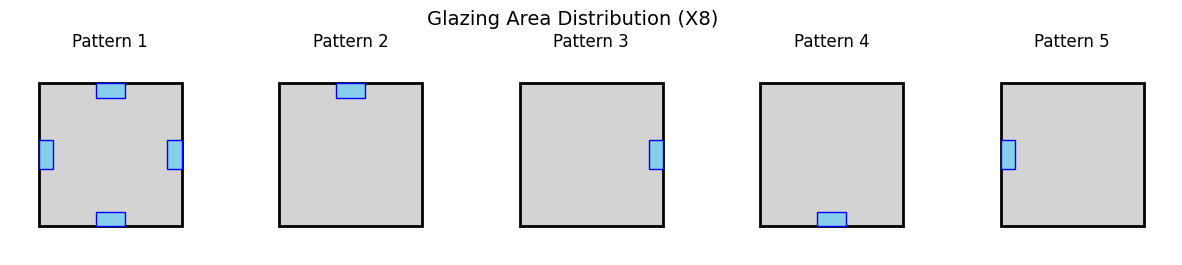

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to draw a building with glazing pattern
def draw_building(ax, pattern):
    # Draw building rectangle
    building = patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='lightgrey')
    ax.add_patch(building)
    
    # Window positions (side: [x,y,width,height])
    sides = {
        "north": [0.4, 0.9, 0.2, 0.1],
        "south": [0.4, 0.0, 0.2, 0.1],
        "east": [0.9, 0.4, 0.1, 0.2],
        "west": [0.0, 0.4, 0.1, 0.2]
    }
    
    # Decide which sides have windows
    if pattern == 1:  # Uniform
        active_sides = ["north", "south", "east", "west"]
    elif pattern == 2:  # North
        active_sides = ["north"]
    elif pattern == 3:  # East
        active_sides = ["east"]
    elif pattern == 4:  # South
        active_sides = ["south"]
    elif pattern == 5:  # West
        active_sides = ["west"]
    
    # Add windows
    for side in active_sides:
        x, y, w, h = sides[side]
        window = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='skyblue')
        ax.add_patch(window)
    
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"Pattern {pattern}")

# Create figure
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(1, 6):
    draw_building(axes[i-1], i)

plt.suptitle("Glazing Area Distribution (X8)", fontsize=14)
plt.show()


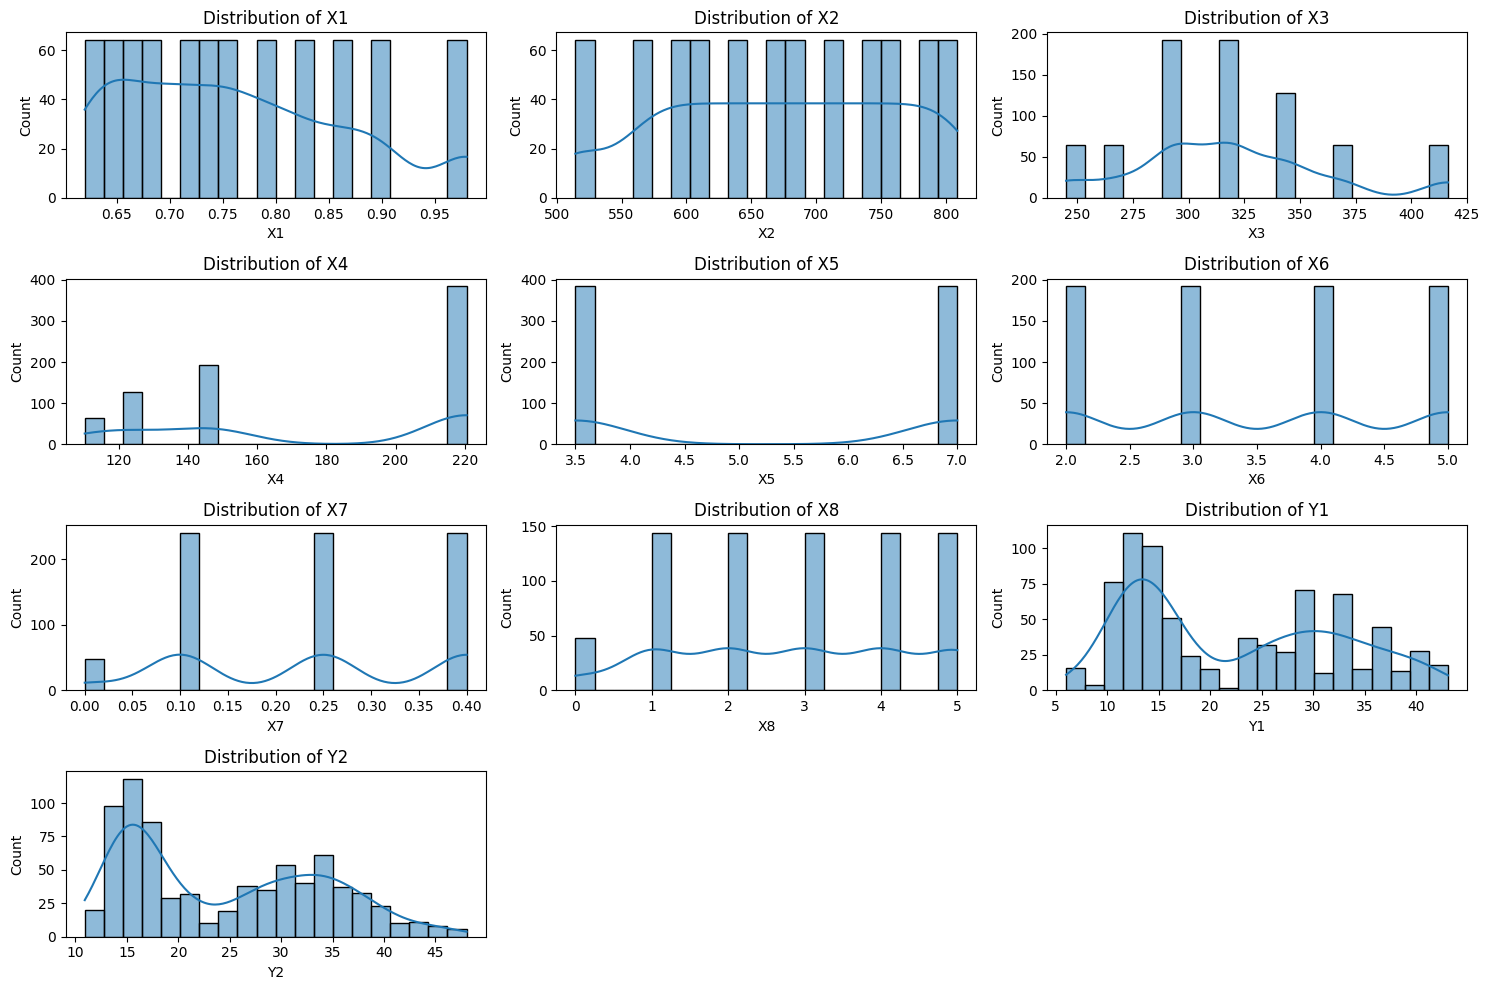

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

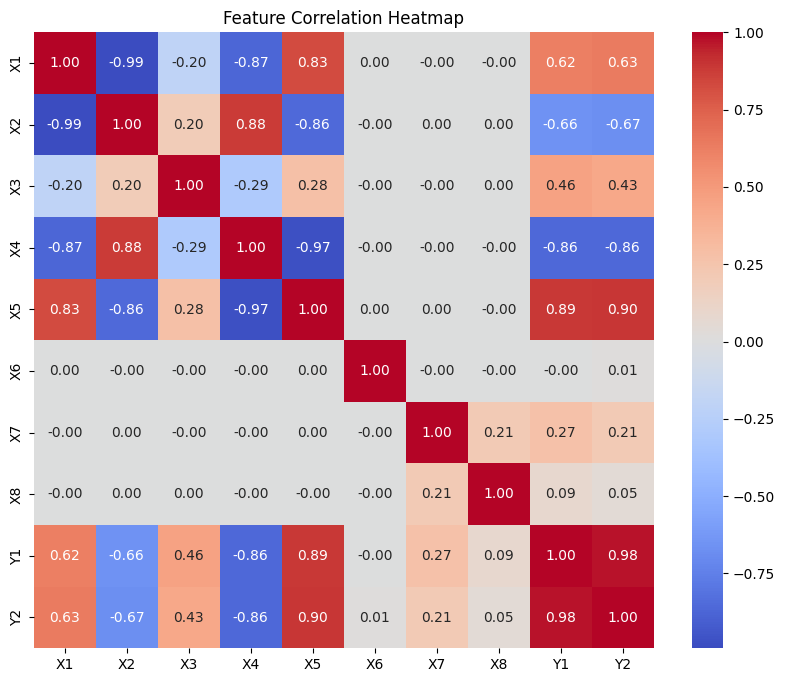

In [35]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_30536\1056383218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target, data=df, palette="Set2")


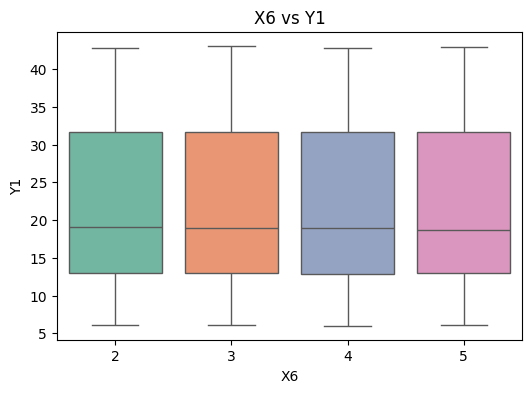

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_30536\1056383218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target, data=df, palette="Set2")


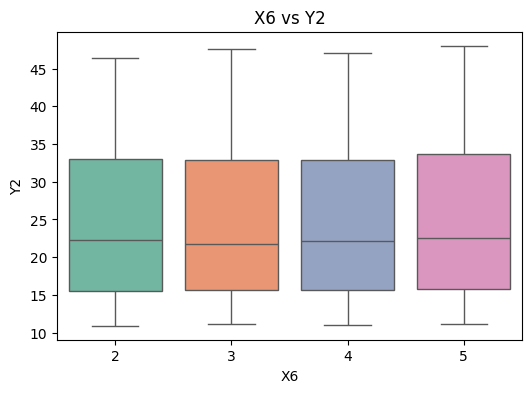

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_30536\1056383218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target, data=df, palette="Set2")


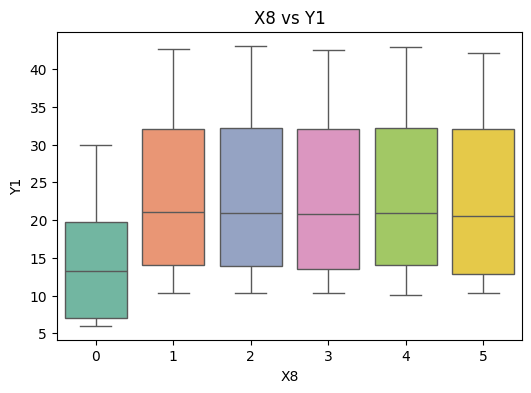

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_30536\1056383218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target, data=df, palette="Set2")


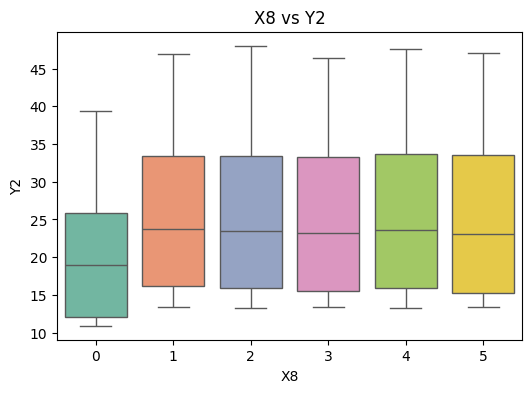

In [36]:
categorical_features = ["X6", "X8"]
targets = ["Y1", "Y2"]

for cat in categorical_features:
    for target in targets:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat, y=target, data=df, palette="Set2")
        plt.title(f"{cat} vs {target}")
        plt.show()


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_updated,y,test_size=0.28,random_state=42)

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [42]:
print(y_pred)

[[28.08163823 30.21687021]
 [29.2470047  31.74186795]
 [31.55006958 33.58916839]
 ...
 [10.02695747 13.45267843]
 [27.98574486 29.96274881]
 [28.25542435 30.37940254]]


In [43]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred)


In [44]:
print(r2_train)

0.9052918606884055


In [45]:
r2_test = r2_score(y_test,y_pred_test)

In [46]:
print(r2_test)

0.9088229038463658


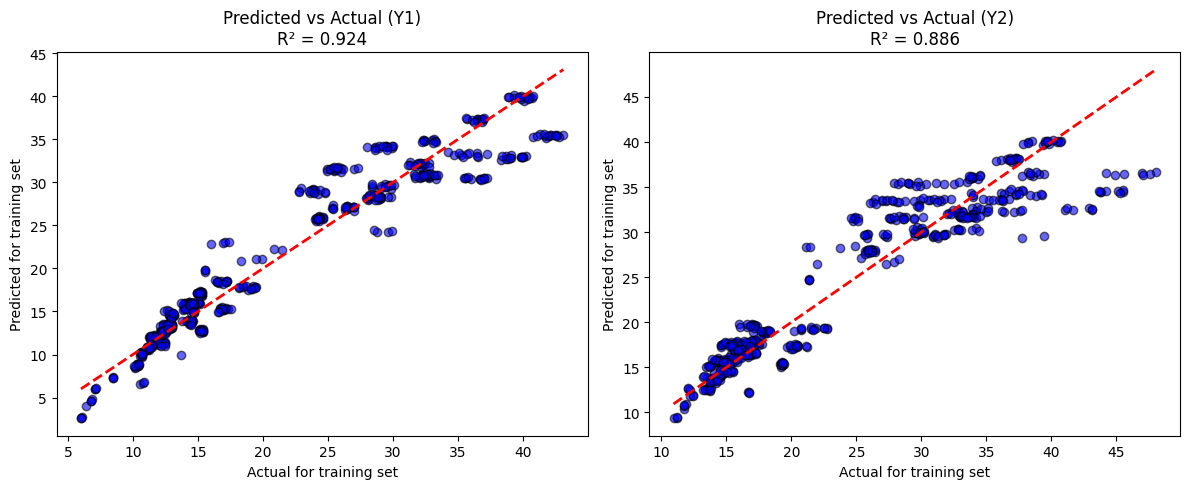

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, target in enumerate(['Y1', 'Y2']):
    axes[idx].scatter(y_train.iloc[:, idx], y_pred[:, idx], color='blue', alpha=0.6, edgecolor='k')
    axes[idx].plot([y_train.iloc[:, idx].min(), y_train.iloc[:, idx].max()],
                   [y_train.iloc[:, idx].min(), y_train.iloc[:, idx].max()],
                   'r--', lw=2)  # 45-degree line
    axes[idx].set_title(f"Predicted vs Actual ({target})\nR² = {r2_score(y_train.iloc[:, idx], y_pred[:, idx]):.3f}")
    axes[idx].set_xlabel("Actual for training set")
    axes[idx].set_ylabel("Predicted for training set")

plt.tight_layout()
plt.show()

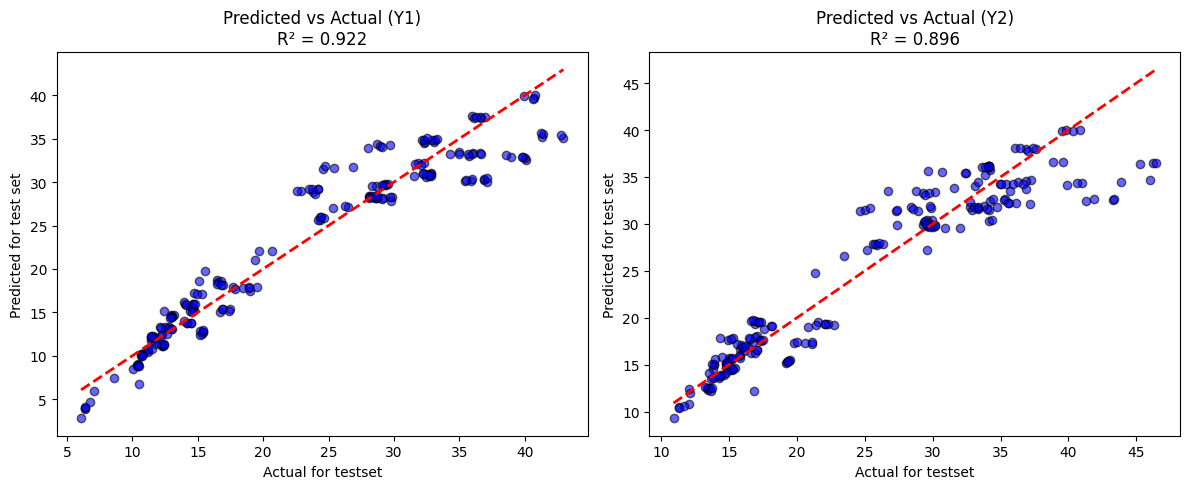

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, target in enumerate(['Y1', 'Y2']):
    axes[idx].scatter(y_test.iloc[:, idx], y_pred_test[:, idx], color='blue', alpha=0.6, edgecolor='k')
    axes[idx].plot([y_test.iloc[:, idx].min(), y_test.iloc[:, idx].max()],
                   [y_test.iloc[:, idx].min(), y_test.iloc[:, idx].max()],
                   'r--', lw=2)  # 45-degree line
    axes[idx].set_title(f"Predicted vs Actual ({target})\nR² = {r2_score(y_test.iloc[:, idx], y_pred_test[:, idx]):.3f}")
    axes[idx].set_xlabel("Actual for testset")
    axes[idx].set_ylabel("Predicted for test set")

plt.tight_layout()
plt.show()

if we analyze through this code our data modeling is working well r2_score of 0.92 is good which is for y1 but we need to improve the y2 part , but if we carefully look into it is performing quite well . using gradient boosting we can increase it's r2 score 
